 Anomaly at step 9: Real = 41.30C, Twin =  39.19C
 Anomaly at step 11: Real = 42.37C, Twin =  40.10C
 Anomaly at step 12: Real = 43.15C, Twin =  40.55C
 Anomaly at step 13: Real = 44.07C, Twin =  40.99C
 Anomaly at step 14: Real = 44.60C, Twin =  41.44C
 Anomaly at step 15: Real = 44.59C, Twin =  41.88C
 Anomaly at step 16: Real = 44.53C, Twin =  42.32C
 Anomaly at step 44: Real = 51.65C, Twin =  53.80C
 Anomaly at step 45: Real = 51.48C, Twin =  54.18C
 Anomaly at step 46: Real = 51.58C, Twin =  54.56C
 Anomaly at step 47: Real = 51.79C, Twin =  54.94C
 Anomaly at step 48: Real = 52.46C, Twin =  55.32C
 Anomaly at step 49: Real = 52.27C, Twin =  55.69C
 Anomaly at step 51: Real = 54.06C, Twin =  56.43C
 Anomaly at step 64: Real = 58.98C, Twin =  61.07C
 Anomaly at step 65: Real = 58.92C, Twin =  61.42C
 Anomaly at step 66: Real = 59.17C, Twin =  61.76C
 Anomaly at step 67: Real = 59.45C, Twin =  62.10C
 Anomaly at step 68: Real = 60.09C, Twin =  62.44C
 Anomaly at step 69: Real = 60.5

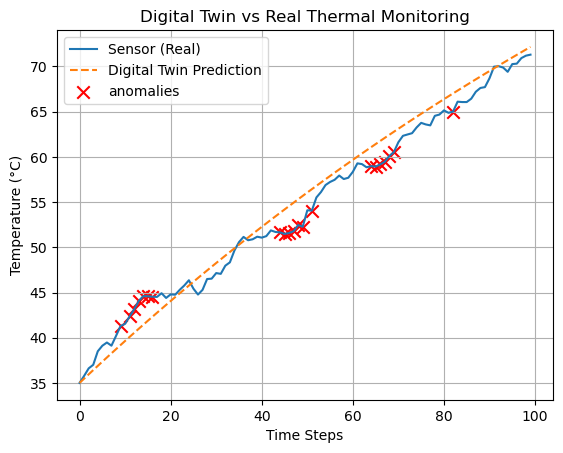

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
time_steps = 100
T_ambient = 30
T_initial = 35
P = 5
alpha = 0.1
h = 0.05
real_temp = [T_initial]
twin_temp = [T_initial]
anomaly_steps = []
anomaly_values = []
for t in range(1, time_steps):
    noise = np.random.normal(0, 0.5)
    T_real = real_temp[-1] + alpha *(P - h * (real_temp[-1] - T_ambient)) + noise
    real_temp.append(T_real)

    T_twin = twin_temp[-1] + alpha *(P - h * (twin_temp[-1] - T_ambient))
    twin_temp.append(T_twin)
    if abs(T_real - T_twin) > 2.0:
        print(f" Anomaly at step {t}: Real = {T_real:0.2f}C, Twin = {T_twin: 0.2f}C")
        anomaly_steps.append(t)
        anomaly_values.append(T_real)
    time.sleep(0.2)
plt.plot(real_temp, label='Sensor (Real)')
plt.plot(twin_temp, label='Digital Twin Prediction', linestyle='--')
plt.scatter(anomaly_steps,anomaly_values, color ='red', marker = 'x', s = 80, label ='anomalies')
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.title("Digital Twin vs Real Thermal Monitoring")
plt.legend()
plt.grid(True)
plt.show()